In [2]:
# PUNTO II

In [4]:
import os

current_directory = os.getcwd()
print(current_directory)

C:\Users\jose.lopez\OneDrive - Vicente Trapani Sa\Documents\GitHub\-Big-Data-UNT--Grupo-1-\TP03


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer



In [7]:
# Carga el archivo Excel
#df = pd.read_excel("C:\Users\jose.lopez\OneDrive - Vicente Trapani Sa\Documents\GitHub\-Big-Data-UNT--Grupo-1-\-Big-Data-UNT--Grupo-1-\TP03\RespondieronJL.xlsx")
df = pd.read_excel(r"C:\Users\jose.lopez\OneDrive - Vicente Trapani Sa\Documents\GitHub\-Big-Data-UNT--Grupo-1-\-Big-Data-UNT--Grupo-1-\TP03\RespondieronJL.xlsx")
#
#C:\\Users\\jose.lopez\O\neDrive - Vicente Trapani Sa\\Documents\\GitHub\\-Big-Data-UNT--Grupo-1-\\TP03\\RespondieronJL.xlsx
# Muestra las primeras 5 filas del DataFrame
print(df.head())

   CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE  H15  REGION MAS_500  \
0  125463  2004          1          1           1    1      40       S   
1  125571  2004          1          1           2    1      40       S   
2  125571  2004          1          1           3    1      40       S   
3  126052  2004          1          1           1    1      40       S   
4  126052  2004          1          1           2    1      40       S   

   AGLOMERADO  PONDERA  ...  ADECCFR PONDIH  PJ1_1  PJ2_1  PJ3_1  IDIMPP  \
0          29      259  ...        4    NaN      0      0      0     0.0   
1          29      296  ...        1    NaN      0      0      0     0.0   
2          29      296  ...        1    NaN      0      0      0     0.0   
3          29      231  ...        9    NaN      0      0      0     0.0   
4          29      231  ...        9    NaN      0      0      0     0.0   

   CH05  DESOCUPADO  PEA  PET  
0   NaT           0    1    1  
1   NaT           0    1    1  
2 

Regresión Logística - Año 2004 - Precisión: 0.9305373525557011
Regresión Logística - Año 2004 - Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       710
           1       0.00      0.00      0.00        53

    accuracy                           0.93       763
   macro avg       0.47      0.50      0.48       763
weighted avg       0.87      0.93      0.90       763

Regresión Logística - Año 2004 - AUC: 0.5

Naive Bayes - Año 2004 - Precisión: 0.4600262123197903
Naive Bayes - Año 2004 - Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.42      0.59       710
           1       0.11      1.00      0.20        53

    accuracy                           0.46       763
   macro avg       0.56      0.71      0.40       763
weighted avg       0.94      0.46      0.56       763

Naive Bayes - Año 2004 - AUC: 0.7323943661971831

LDA - Año 2004 - Precisió

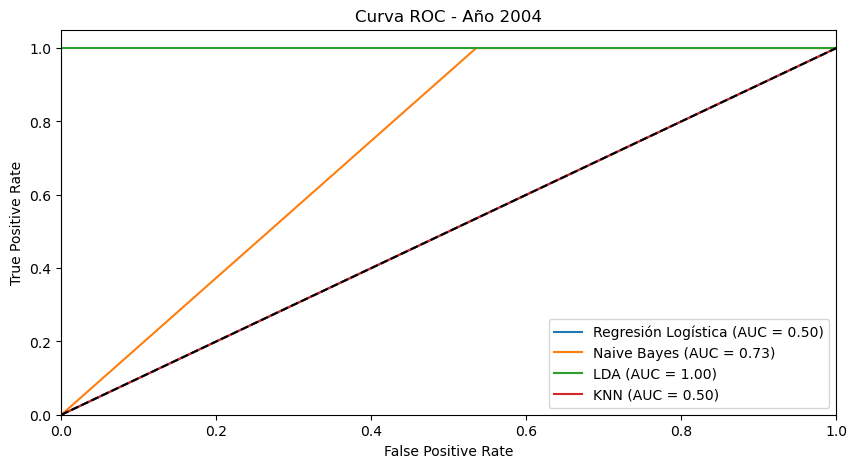

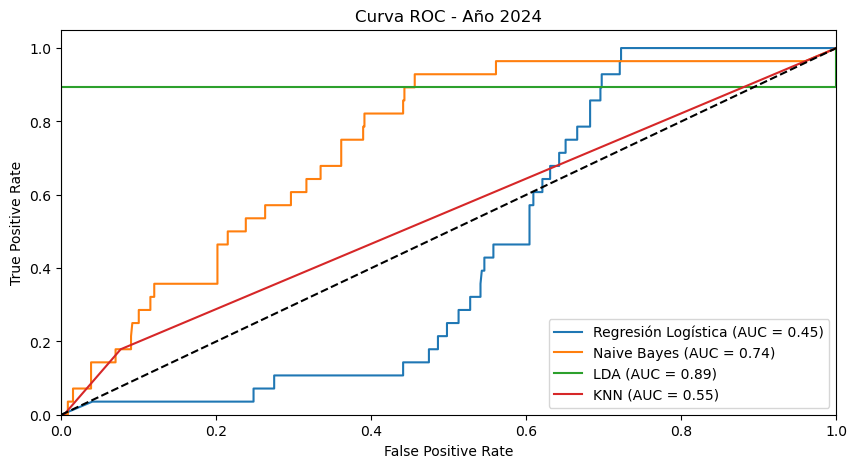

In [14]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Establece la variable de entorno para LOKY_MAX_CPU_COUNT
os.environ['LOKY_MAX_CPU_COUNT'] = '4'  # Reemplaza 4 con el número de núcleos que deseas usar


# Filtra los datos por año
df_2004 = df[df['ANO4'] == 2004]
df_2024 = df[df['ANO4'] == 2024]

# Divide los datos en variables dependientes e independientes para cada año
X_2004 = df_2004.drop('DESOCUPADO', axis=1)
y_2004 = df_2004['DESOCUPADO']
X_2024 = df_2024.drop('DESOCUPADO', axis=1)
y_2024 = df_2024['DESOCUPADO']

# Agrega una columna de unos a las variables independientes
X_2004['ones'] = 1
X_2024['ones'] = 1

# Convierte las columnas a valores numéricos y maneja los errores
for column in X_2004.columns:
    X_2004[column] = pd.to_numeric(X_2004[column], errors='coerce')
    X_2024[column] = pd.to_numeric(X_2024[column], errors='coerce')

# Elimina columnas que no tienen ningún valor observado
X_2004 = X_2004.dropna(axis=1, how='all')
X_2024 = X_2024.dropna(axis=1, how='all')

# Utiliza SimpleImputer para reemplazar los valores NaN con la media de la columna
imputer = SimpleImputer(strategy='mean')
X_2004 = imputer.fit_transform(X_2004)
X_2024 = imputer.fit_transform(X_2024)

# Divide los datos en conjuntos de entrenamiento y prueba para cada año
X_train_2004, X_test_2004, y_train_2004, y_test_2004 = train_test_split(X_2004, y_2004, test_size=0.3, random_state=101)
X_train_2024, X_test_2024, y_train_2024, y_test_2024 = train_test_split(X_2024, y_2024, test_size=0.3, random_state=101)

# Función para entrenar y evaluar modelos y generar la curva ROC
def train_evaluate_roc(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=0)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    return accuracy, report, fpr, tpr, auc

# Modelos
models = {
    'Regresión Logística': LogisticRegression(max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'LDA': LinearDiscriminantAnalysis(),
    'KNN': KNeighborsClassifier(n_neighbors=3)
}

# Resultados para el año 2004
results_2004 = {}
for name, model in models.items():
    accuracy, report, fpr, tpr, auc = train_evaluate_roc(model, X_train_2004, X_test_2004, y_train_2004, y_test_2004)
    results_2004[name] = {'accuracy': accuracy, 'report': report, 'fpr': fpr, 'tpr': tpr, 'auc': auc}
    print(f'{name} - Año 2004 - Precisión: {accuracy}')
    print(f'{name} - Año 2004 - Reporte de Clasificación:\n{report}')
    print(f'{name} - Año 2004 - AUC: {auc}\n')

# Resultados para el año 2024
results_2024 = {}
for name, model in models.items():
    accuracy, report, fpr, tpr, auc = train_evaluate_roc(model, X_train_2024, X_test_2024, y_train_2024, y_test_2024)
    results_2024[name] = {'accuracy': accuracy, 'report': report, 'fpr': fpr, 'tpr': tpr, 'auc': auc}
    print(f'{name} - Año 2024 - Precisión: {accuracy}')
    print(f'{name} - Año 2024 - Reporte de Clasificación:\n{report}')
    print(f'{name} - Año 2024 - AUC: {auc}\n')

# Comparar resultados en un DataFrame
df_results_2004 = pd.DataFrame({
    'Modelo': list(results_2004.keys()),
    'Precisión': [results_2004[model]['accuracy'] for model in results_2004],
    'AUC': [results_2004[model]['auc'] for model in results_2004]
})

df_results_2024 = pd.DataFrame({
    'Modelo': list(results_2024.keys()),
    'Precisión': [results_2024[model]['accuracy'] for model in results_2024],
    'AUC': [results_2024[model]['auc'] for model in results_2024]
})

print("Resultados para el año 2004:")
print(df_results_2004)
print("\nResultados para el año 2024:")
print(df_results_2024)

# Graficar las curvas ROC para el año 2004
plt.figure(figsize=(10, 5))
for model in results_2004:
    plt.plot(results_2004[model]['fpr'], results_2004[model]['tpr'], label=f'{model} (AUC = {results_2004[model]["auc"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Año 2004')
plt.legend(loc="lower right")
plt.show()

# Graficar las curvas ROC para el año 2024
plt.figure(figsize=(10, 5))
for model in results_2024:
    plt.plot(results_2024[model]['fpr'], results_2024[model]['tpr'], label=f'{model} (AUC = {results_2024[model]["auc"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Año 2024')
plt.legend(loc="lower right")
plt.show()

